In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gsd_metrics import SCALES
from gsd_utils import papermode
import matplotlib.ticker as mtick

papermode(plt=plt)

In [2]:
patch_size = 184

In [3]:
# Paths
data_path = Path.cwd().parent / "data"
gsddat_folder = data_path / "gsds" / "val"
results_dir = Path.cwd() / "results"
gsd_resdir = results_dir / "gsd" / "resize"
df = pd.read_csv(gsd_resdir / f"gsd-metrics-p{patch_size}.csv")

figs_path = Path("figs")
figs_path.mkdir(exist_ok=True, parents=True)

In [4]:
df

,GSD,scale,iou,acc,f1
0,GSD0,1.000000,0.228314,0.736615,0.318871
1,GSD0,1.000000,0.102637,0.313316,0.164382
2,GSD0,1.000000,0.241588,0.500669,0.360649
3,GSD0,1.000000,0.314502,0.601032,0.441606
4,GSD0,1.000000,0.227620,0.670699,0.302392
...,...,...,...,...,...
463,GSD3,0.296296,0.005180,0.010073,0.010254
464,GSD3,0.296296,0.020372,0.062686,0.038254
465,GSD3,0.296296,0.022148,0.102292,0.040691
466,GSD3,0.296296,0.002778,0.012738,0.005495


(0.0, 100.0)

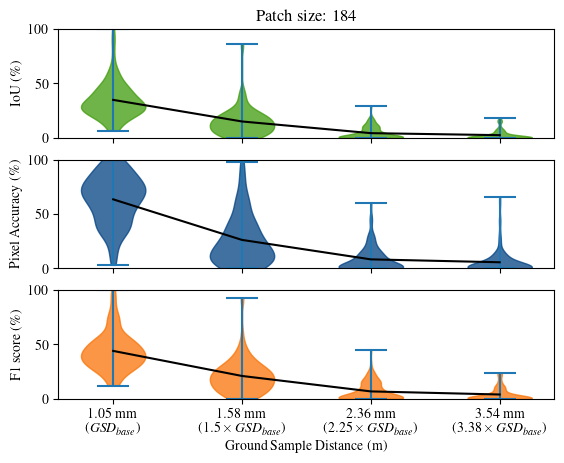

In [5]:
fig, axs = plt.subplots(nrows=3, sharex=True)

ious = [100 * df[df.GSD == gsd].iou for gsd in df.GSD.unique()]
accs = [100 * df[df.GSD == gsd].acc for gsd in df.GSD.unique()]
f1s = [100 * df[df.GSD == gsd].f1 for gsd in df.GSD.unique()]

m_IOU = [iou.mean() for iou in ious]
m_acc = [acc.mean() for acc in accs]
m_f1 = [f1.mean() for f1 in f1s]

vio_ious = axs[0].violinplot(ious, showmeans=False)
vio_accs = axs[1].violinplot(accs, showmeans=False)
vio_f1s = axs[2].violinplot(f1s, showmeans=False)
inv_scales = 1 / SCALES
xlabs = ["$1.05$ mm\n(${GSD}_{base}$)"]
gsdsnum = inv_scales[:, None] @ np.array([1, 1.05])[None, :]
for gsds in gsdsnum.round(2)[1:, :]:
    gsd, avg = gsds
    xlabs.append(f"${avg}$ mm\n(${gsd}\\times {{GSD}}_{{base}}$)")

for pc_iou in vio_ious["bodies"]:
    pc_iou.set_facecolor("xkcd:grass green")
    pc_iou.set_edgecolor("xkcd:grass green")
    pc_iou.set_alpha(0.75)

for pc_acc in vio_accs["bodies"]:
    pc_acc.set_facecolor("xkcd:darkish blue")
    pc_acc.set_edgecolor("xkcd:darkish blue")
    pc_acc.set_alpha(0.75)

for pc_f1 in vio_f1s["bodies"]:
    pc_f1.set_facecolor("xkcd:orange")
    pc_f1.set_edgecolor("xkcd:orange")
    pc_f1.set_alpha(0.75)

xticks = 1 + np.arange(SCALES.size)

axs[0].plot(xticks, m_IOU, "k")
axs[1].plot(xticks, m_acc, "k")
axs[2].plot(xticks, m_f1, "k")

axs[2].set_xticks(xticks, xlabs)
axs[2].set_xlabel("Ground Sample Distance (m)")

axs[0].set_ylabel("IoU (\%)")
axs[1].set_ylabel("Pixel Accuracy (\%)")
axs[2].set_ylabel("F1 score (\%)")

axs[0].set_title(f"Patch size: {patch_size}")

axs[0].set_ylim(bottom=0, top=100)
axs[1].set_ylim(bottom=0, top=100)
axs[2].set_ylim(bottom=0, top=100)

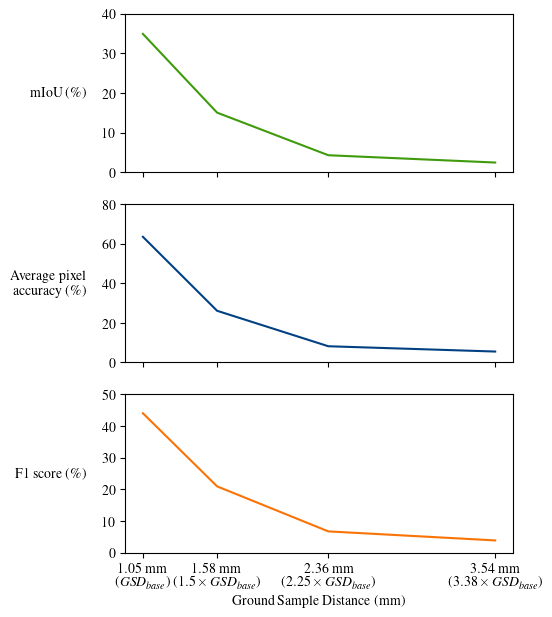

In [6]:
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(5, 7))

ious = [100 * df[df.GSD == gsd].iou for gsd in df.GSD.unique()]
accs = [100 * df[df.GSD == gsd].acc for gsd in df.GSD.unique()]
f1s = [100 * df[df.GSD == gsd].f1 for gsd in df.GSD.unique()]

m_IOU = [iou.mean() for iou in ious]
m_acc = [acc.mean() for acc in accs]
m_f1 = [f1.mean() for f1 in f1s]

inv_scales = 1 / SCALES
xlabs = ["$1.05$ mm\n(${GSD}_{base}$)"]
gsdsnum = inv_scales[:, None] @ np.array([1, 1.05])[None, :]
for gsds in gsdsnum.round(2)[1:, :]:
    gsd, avg = gsds
    xlabs.append(f"${avg}$ mm\n(${gsd}\\times {{GSD}}_{{base}}$)")


axs[0].plot(
    gsdsnum[:, 1], m_IOU, color="xkcd:grass green"
)  # , marker="o", linestyle="",)
axs[1].plot(
    gsdsnum[:, 1], m_acc, color="xkcd:darkish blue"
)  # , marker="o", linestyle="",)
axs[2].plot(gsdsnum[:, 1], m_f1, color="xkcd:orange")  # , marker="o", linestyle="",)

# axs[2].set_xscale("log")
axs[2].set_xticks(gsdsnum[:, 1], xlabs)
axs[2].set_xlabel("Ground Sample Distance (mm)")

axs[0].set_ylabel("mIoU (\%)", rotation=0, ha="right", va="center")
axs[1].set_ylabel("Average pixel\naccuracy (\%)", rotation=0, ha="right", va="center")
axs[2].set_ylabel("F1 score (\%)", rotation=0, ha="right", va="center")

axs[0].yaxis.set_label_coords(-0.1, 0.5)
axs[1].yaxis.set_label_coords(-0.1, 0.5)
axs[2].yaxis.set_label_coords(-0.1, 0.5)

axs[0].set_ylim(bottom=0, top=40)
axs[1].set_ylim(bottom=0, top=80)
axs[2].set_ylim(bottom=0, top=50)

# axs[2].set_minor_formatter(mtick.ScalarFormatter())
# axs[2].ticklabel_format(style='plain')

fig.savefig(figs_path / f"gsds-{patch_size}.pdf", bbox_inches="tight")